In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [397]:
regions = pd.DataFrame({
    'region_id': [0, 1, 2],
    'region_name': ['USA', 'India', 'Canada'],
    'travel_dom': [0.9, 0.9, 0.9],
    'travel_int': [0.1, 0.1, 0.1],
    'xmin': [0, 110, 220],
    'xmax': [100, 210, 320],
    'ymin': [0, 0, 0],
    'ymax': [100, 100, 100],
    'domestic_step_size': [1.0, 1.0, 1.0]
})

In [398]:
regions

,region_id,region_name,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,0,USA,0.9,0.1,0,100,0,100,1.0
1,1,India,0.9,0.1,110,210,0,100,1.0
2,2,Canada,0.9,0.1,220,320,0,100,1.0


In [399]:
people = pd.DataFrame({
    'id': [],
    'home_region': [],
    'region_name': [],
    'x': [],
    'y': []
})

In [400]:
people

,id,home_region,region_name,x,y


In [401]:
for i, region in enumerate(regions.region_name):
    # get region window
    xmin, xmax, ymin, ymax = regions.loc[i, ['xmin', 'xmax', 'ymin', 'ymax']].values.tolist()

    # create region population
    region_population = pd.DataFrame({
        'id': range(i*50+1, i*50+51),
        'home_region': [region] * 50,
        'region_name': [region] * 50,
        'x': np.random.uniform(low=xmin, high=xmax, size=(50,)),
        'y': np.random.uniform(low=ymin, high=ymax, size=(50,))
    })

    # add region population to world population
    people = pd.concat([people, region_population], axis=0).reset_index(drop=True)

In [402]:
people

,id,home_region,region_name,x,y
0,1.0,USA,USA,95.557509,32.024546
1,2.0,USA,USA,28.129390,99.847981
2,3.0,USA,USA,94.139777,6.271645
3,4.0,USA,USA,74.396144,24.737563
4,5.0,USA,USA,21.068492,31.822108
...,...,...,...,...,...
145,146.0,Canada,Canada,254.536760,63.942946
146,147.0,Canada,Canada,229.287673,41.230300
147,148.0,Canada,Canada,243.790388,93.247842
148,149.0,Canada,Canada,266.514061,6.301858


In [165]:
np.count_nonzero(people.isna().values)

0

In [166]:
regions

,region_id,region_name,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,0,USA,0.9,0.2,0,100,0,100,1.0
1,1,India,0.9,0.2,110,210,0,100,1.0
2,2,Canada,0.9,0.2,220,320,0,100,1.0


In [167]:
people.region_name

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
145    Canada
146    Canada
147    Canada
148    Canada
149    Canada
Name: region_name, Length: 150, dtype: object

In [168]:
combined = pd.merge(people, regions, on='region_name')

In [169]:
combined

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,1.0,USA,USA,82.783794,10.511780,0,0.9,0.2,0,100,0,100,1.0
1,2.0,USA,USA,37.628424,18.780056,0,0.9,0.2,0,100,0,100,1.0
2,3.0,USA,USA,18.915849,75.823675,0,0.9,0.2,0,100,0,100,1.0
3,4.0,USA,USA,59.628062,17.202628,0,0.9,0.2,0,100,0,100,1.0
4,5.0,USA,USA,27.278491,19.632474,0,0.9,0.2,0,100,0,100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48.0,Canada,Canada,288.661925,47.353689,2,0.9,0.2,220,320,0,100,1.0
146,49.0,Canada,Canada,318.417449,65.895843,2,0.9,0.2,220,320,0,100,1.0
147,50.0,Canada,Canada,311.713744,38.023032,2,0.9,0.2,220,320,0,100,1.0
148,51.0,Canada,Canada,251.303794,12.133644,2,0.9,0.2,220,320,0,100,1.0


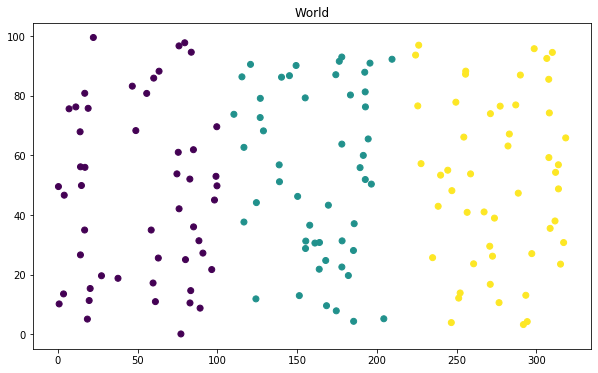

In [170]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('World')
ax.scatter(combined.x, combined.y, c=combined.region_id)

In [172]:
np.count_nonzero(combined.isna().values)

0

# Domestic Travel

In [173]:
combined

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,1.0,USA,USA,82.783794,10.511780,0,0.9,0.2,0,100,0,100,1.0
1,2.0,USA,USA,37.628424,18.780056,0,0.9,0.2,0,100,0,100,1.0
2,3.0,USA,USA,18.915849,75.823675,0,0.9,0.2,0,100,0,100,1.0
3,4.0,USA,USA,59.628062,17.202628,0,0.9,0.2,0,100,0,100,1.0
4,5.0,USA,USA,27.278491,19.632474,0,0.9,0.2,0,100,0,100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48.0,Canada,Canada,288.661925,47.353689,2,0.9,0.2,220,320,0,100,1.0
146,49.0,Canada,Canada,318.417449,65.895843,2,0.9,0.2,220,320,0,100,1.0
147,50.0,Canada,Canada,311.713744,38.023032,2,0.9,0.2,220,320,0,100,1.0
148,51.0,Canada,Canada,251.303794,12.133644,2,0.9,0.2,220,320,0,100,1.0


In [174]:
move_idx = np.random.random((combined.shape[0], )) < combined['travel_dom']
movers = combined.loc[move_idx, :]

In [175]:
movers

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,1.0,USA,USA,82.783794,10.511780,0,0.9,0.2,0,100,0,100,1.0
1,2.0,USA,USA,37.628424,18.780056,0,0.9,0.2,0,100,0,100,1.0
2,3.0,USA,USA,18.915849,75.823675,0,0.9,0.2,0,100,0,100,1.0
3,4.0,USA,USA,59.628062,17.202628,0,0.9,0.2,0,100,0,100,1.0
4,5.0,USA,USA,27.278491,19.632474,0,0.9,0.2,0,100,0,100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,47.0,Canada,Canada,271.200211,74.026885,2,0.9,0.2,220,320,0,100,1.0
145,48.0,Canada,Canada,288.661925,47.353689,2,0.9,0.2,220,320,0,100,1.0
146,49.0,Canada,Canada,318.417449,65.895843,2,0.9,0.2,220,320,0,100,1.0
148,51.0,Canada,Canada,251.303794,12.133644,2,0.9,0.2,220,320,0,100,1.0


In [176]:
movers[['x', 'y']]

,x,y
0,82.783794,10.511780
1,37.628424,18.780056
2,18.915849,75.823675
3,59.628062,17.202628
4,27.278491,19.632474
...,...,...
144,271.200211,74.026885
145,288.661925,47.353689
146,318.417449,65.895843
148,251.303794,12.133644


In [177]:
disp_x = np.random.normal(scale=movers['domestic_step_size']).reshape((-1, 1))
disp_y = np.random.normal(scale=movers['domestic_step_size']).reshape((-1, 1))

In [178]:
disp_x.shape

(140, 1)

In [389]:
np.random.normal(scale=movers['domestic_step_size'])

array([ 0.93375994, -0.18261033, -0.03410525, -0.9601913 ,  2.15143923,
       -2.06508868,  0.12962635, -0.12882613, -0.14307193, -0.29312333,
        1.45099146,  0.61762547, -2.66928005])

In [179]:
disp = np.concatenate([disp_x, disp_y], axis=1)

In [180]:
disp.shape

(140, 2)

In [182]:
movers[['x', 'y']] += disp

C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [184]:
movers

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,1.0,USA,USA,82.113184,10.778732,0,0.9,0.2,0,100,0,100,1.0
1,2.0,USA,USA,36.140595,18.467039,0,0.9,0.2,0,100,0,100,1.0
2,3.0,USA,USA,19.983310,74.192861,0,0.9,0.2,0,100,0,100,1.0
3,4.0,USA,USA,59.961114,16.829667,0,0.9,0.2,0,100,0,100,1.0
4,5.0,USA,USA,27.797201,19.736772,0,0.9,0.2,0,100,0,100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,47.0,Canada,Canada,270.476946,74.878608,2,0.9,0.2,220,320,0,100,1.0
145,48.0,Canada,Canada,288.983770,46.576567,2,0.9,0.2,220,320,0,100,1.0
146,49.0,Canada,Canada,319.007047,65.826632,2,0.9,0.2,220,320,0,100,1.0
148,51.0,Canada,Canada,252.515042,10.913495,2,0.9,0.2,220,320,0,100,1.0


In [185]:
np.count_nonzero(movers.isna().values)

0

In [186]:
movers['x'] = movers['x'].clip(movers['xmin'], movers['xmax'])
movers['y'] = movers['y'].clip(movers['ymin'], movers['ymax'])

C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [187]:
movers

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,1.0,USA,USA,82.113184,10.778732,0,0.9,0.2,0,100,0,100,1.0
1,2.0,USA,USA,36.140595,18.467039,0,0.9,0.2,0,100,0,100,1.0
2,3.0,USA,USA,19.983310,74.192861,0,0.9,0.2,0,100,0,100,1.0
3,4.0,USA,USA,59.961114,16.829667,0,0.9,0.2,0,100,0,100,1.0
4,5.0,USA,USA,27.797201,19.736772,0,0.9,0.2,0,100,0,100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,47.0,Canada,Canada,270.476946,74.878608,2,0.9,0.2,220,320,0,100,1.0
145,48.0,Canada,Canada,288.983770,46.576567,2,0.9,0.2,220,320,0,100,1.0
146,49.0,Canada,Canada,319.007047,65.826632,2,0.9,0.2,220,320,0,100,1.0
148,51.0,Canada,Canada,252.515042,10.913495,2,0.9,0.2,220,320,0,100,1.0


In [193]:
move_idx

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147    False
148     True
149     True
Name: travel_dom, Length: 150, dtype: bool

In [188]:
np.count_nonzero(movers.isna().values)

0

In [194]:
np.count_nonzero(move_idx)

140

In [195]:
movers.shape

(140, 13)

In [196]:
people.loc[move_idx, :]

,id,home_region,region_name,x,y
0,1.0,USA,USA,82.783794,10.511780
1,2.0,USA,USA,37.628424,18.780056
2,3.0,USA,USA,18.915849,75.823675
3,4.0,USA,USA,59.628062,17.202628
4,5.0,USA,USA,27.278491,19.632474
...,...,...,...,...,...
144,47.0,Canada,Canada,271.200211,74.026885
145,48.0,Canada,Canada,288.661925,47.353689
146,49.0,Canada,Canada,318.417449,65.895843
148,51.0,Canada,Canada,251.303794,12.133644


In [197]:
people

,id,home_region,region_name,x,y
0,1.0,USA,USA,82.783794,10.511780
1,2.0,USA,USA,37.628424,18.780056
2,3.0,USA,USA,18.915849,75.823675
3,4.0,USA,USA,59.628062,17.202628
4,5.0,USA,USA,27.278491,19.632474
...,...,...,...,...,...
145,48.0,Canada,Canada,288.661925,47.353689
146,49.0,Canada,Canada,318.417449,65.895843
147,50.0,Canada,Canada,311.713744,38.023032
148,51.0,Canada,Canada,251.303794,12.133644


In [198]:
people.loc[move_idx, ['x', 'y']] = movers.loc[:, ['x', 'y']]

In [200]:
np.count_nonzero(people.isna().values)

0

In [206]:
combined = pd.merge(people, regions, on='region_name')

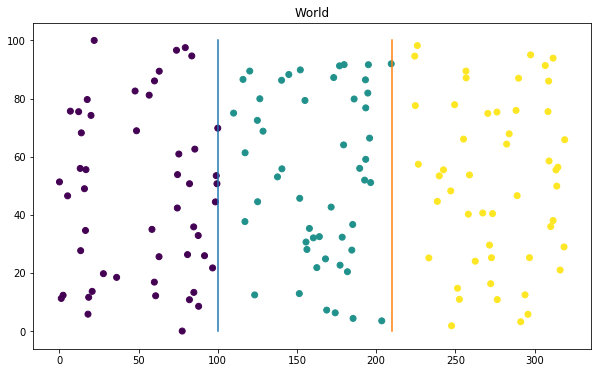

In [207]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('World')
ax.plot([100, 100], [0, 100])
ax.plot([210, 210], [0, 100])
ax.scatter(combined.x, combined.y, c=combined.region_id)

# International Travel

In [403]:
# join people and regions
combined = pd.merge(people, regions, on='region_name')

# get people who will move
move_idx = np.random.random((combined.shape[0], )) < combined['travel_int']

In [405]:
combined.loc[move_idx, :]

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
28,29.0,USA,USA,59.480900,11.099401,0,0.9,0.1,0,100,0,100,1.0
33,34.0,USA,USA,33.803747,31.997952,0,0.9,0.1,0,100,0,100,1.0
35,36.0,USA,USA,57.929710,37.624122,0,0.9,0.1,0,100,0,100,1.0
55,56.0,India,India,153.106708,27.480699,1,0.9,0.1,110,210,0,100,1.0
65,66.0,India,India,147.413207,39.559286,1,0.9,0.1,110,210,0,100,1.0
80,81.0,India,India,178.995996,63.288766,1,0.9,0.1,110,210,0,100,1.0
90,91.0,India,India,208.097629,24.857284,1,0.9,0.1,110,210,0,100,1.0
104,105.0,Canada,Canada,312.525371,68.134952,2,0.9,0.1,220,320,0,100,1.0
106,107.0,Canada,Canada,303.011909,54.887438,2,0.9,0.1,220,320,0,100,1.0
107,108.0,Canada,Canada,314.375475,51.783345,2,0.9,0.1,220,320,0,100,1.0


In [406]:
combined.loc[move_idx, 'region_name'] = combined.loc[move_idx, 'region_name'].apply(lambda region: regions[regions.region_name != region].region_name.sample(n=1).item())

In [407]:
combined.loc[move_idx, :]

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
28,29.0,USA,India,59.480900,11.099401,0,0.9,0.1,0,100,0,100,1.0
33,34.0,USA,India,33.803747,31.997952,0,0.9,0.1,0,100,0,100,1.0
35,36.0,USA,Canada,57.929710,37.624122,0,0.9,0.1,0,100,0,100,1.0
55,56.0,India,USA,153.106708,27.480699,1,0.9,0.1,110,210,0,100,1.0
65,66.0,India,Canada,147.413207,39.559286,1,0.9,0.1,110,210,0,100,1.0
80,81.0,India,Canada,178.995996,63.288766,1,0.9,0.1,110,210,0,100,1.0
90,91.0,India,Canada,208.097629,24.857284,1,0.9,0.1,110,210,0,100,1.0
104,105.0,Canada,India,312.525371,68.134952,2,0.9,0.1,220,320,0,100,1.0
106,107.0,Canada,India,303.011909,54.887438,2,0.9,0.1,220,320,0,100,1.0
107,108.0,Canada,USA,314.375475,51.783345,2,0.9,0.1,220,320,0,100,1.0


In [413]:
combined.loc[move_idx, ['region_name', 'x', 'y']].merge(regions, on='region_name').set_index(combined.loc[move_idx, :].index)

,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
28,India,59.480900,11.099401,1,0.9,0.1,110,210,0,100,1.0
33,India,33.803747,31.997952,1,0.9,0.1,110,210,0,100,1.0
35,India,312.525371,68.134952,1,0.9,0.1,110,210,0,100,1.0
55,India,303.011909,54.887438,1,0.9,0.1,110,210,0,100,1.0
65,India,285.242022,70.407347,1,0.9,0.1,110,210,0,100,1.0
80,Canada,57.929710,37.624122,2,0.9,0.1,220,320,0,100,1.0
90,Canada,147.413207,39.559286,2,0.9,0.1,220,320,0,100,1.0
104,Canada,178.995996,63.288766,2,0.9,0.1,220,320,0,100,1.0
106,Canada,208.097629,24.857284,2,0.9,0.1,220,320,0,100,1.0
107,USA,153.106708,27.480699,0,0.9,0.1,0,100,0,100,1.0


In [376]:
movers_comb = movers.loc[:, ['id', 'region_name', 'x', 'y']].merge(regions, on='region_name').set_index(movers.index)

In [377]:
movers_comb

,id,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
9,10.0,India,90.311224,47.207422,1,0.9,0.1,110,210,0,100,1.0
10,11.0,India,5.962563,56.507612,1,0.9,0.1,110,210,0,100,1.0
15,102.0,India,300.215531,70.180642,1,0.9,0.1,110,210,0,100,1.0
22,16.0,Canada,83.576846,13.690707,2,0.9,0.1,220,320,0,100,1.0
28,23.0,Canada,96.914257,23.249884,2,0.9,0.1,220,320,0,100,1.0
50,29.0,Canada,40.642119,82.209717,2,0.9,0.1,220,320,0,100,1.0
80,95.0,Canada,158.326211,65.292374,2,0.9,0.1,220,320,0,100,1.0
82,51.0,USA,175.203605,5.958871,0,0.9,0.1,0,100,0,100,1.0
94,81.0,USA,155.103606,4.192298,0,0.9,0.1,0,100,0,100,1.0
95,83.0,USA,134.269463,73.357948,0,0.9,0.1,0,100,0,100,1.0


In [378]:
movers_comb['x'] = (movers_comb.xmin + movers_comb.xmax) / 2

In [379]:
movers_comb['y'] = (movers_comb.ymin + movers_comb.ymax) / 2

In [380]:
movers_comb

,id,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
9,10.0,India,160.0,50.0,1,0.9,0.1,110,210,0,100,1.0
10,11.0,India,160.0,50.0,1,0.9,0.1,110,210,0,100,1.0
15,102.0,India,160.0,50.0,1,0.9,0.1,110,210,0,100,1.0
22,16.0,Canada,270.0,50.0,2,0.9,0.1,220,320,0,100,1.0
28,23.0,Canada,270.0,50.0,2,0.9,0.1,220,320,0,100,1.0
50,29.0,Canada,270.0,50.0,2,0.9,0.1,220,320,0,100,1.0
80,95.0,Canada,270.0,50.0,2,0.9,0.1,220,320,0,100,1.0
82,51.0,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
94,81.0,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
95,83.0,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0


In [381]:
people.loc[move_idx, ['x', 'y', 'region_name']] = movers_comb.loc[:, ['x', 'y', 'region_name']]

In [383]:
people[people.id == 10]

,id,home_region,region_name,x,y
9,10.0,USA,India,160.0,50.0


In [384]:
pd.merge(people, regions, on='region_name')

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
0,1.0,USA,USA,34.475201,34.178302,0,0.9,0.1,0,100,0,100,1.0
1,2.0,USA,USA,42.685192,99.304630,0,0.9,0.1,0,100,0,100,1.0
2,3.0,USA,USA,21.100927,89.639931,0,0.9,0.1,0,100,0,100,1.0
3,4.0,USA,USA,21.443592,70.397259,0,0.9,0.1,0,100,0,100,1.0
4,5.0,USA,USA,25.429691,61.652819,0,0.9,0.1,0,100,0,100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146.0,Canada,Canada,286.346816,50.918501,2,0.9,0.1,220,320,0,100,1.0
146,147.0,Canada,Canada,309.097780,87.275298,2,0.9,0.1,220,320,0,100,1.0
147,148.0,Canada,Canada,294.946074,37.911864,2,0.9,0.1,220,320,0,100,1.0
148,149.0,Canada,Canada,230.593318,10.595574,2,0.9,0.1,220,320,0,100,1.0


In [240]:
combined = pd.merge(people, regions, on='region_name')

In [241]:
combined.loc[[15, 37], :]

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
15,26.0,USA,USA,77.550168,0.0,0,0.9,0.2,0,100,0,100,1.0
37,29.0,India,USA,160.000000,50.0,0,0.9,0.2,0,100,0,100,1.0


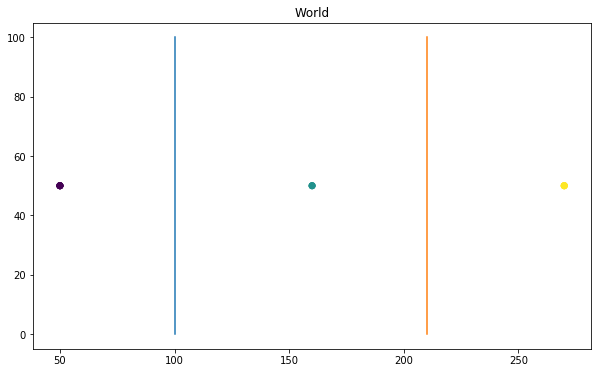

In [387]:
combined = pd.merge(people, regions, on='region_name')
combined = combined[combined.home_region != combined.region_name]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('World')
ax.plot([100, 100], [0, 100])
ax.plot([210, 210], [0, 100])
ax.scatter(combined.x, combined.y, c=combined.region_id)

In [386]:
combined[combined.home_region != combined.region_name]

,id,home_region,region_name,x,y,region_id,travel_dom,travel_int,xmin,xmax,ymin,ymax,domestic_step_size
45,83.0,India,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
46,95.0,India,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
47,96.0,India,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
48,102.0,Canada,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
49,125.0,Canada,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
50,141.0,Canada,USA,50.0,50.0,0,0.9,0.1,0,100,0,100,1.0
51,10.0,USA,India,160.0,50.0,1,0.9,0.1,110,210,0,100,1.0
52,11.0,USA,India,160.0,50.0,1,0.9,0.1,110,210,0,100,1.0
53,16.0,USA,India,160.0,50.0,1,0.9,0.1,110,210,0,100,1.0
99,23.0,USA,Canada,270.0,50.0,2,0.9,0.1,220,320,0,100,1.0


In [390]:
x = pd.DataFrame({'a': np.random.random((10,)), 'b': np.random.random((10,))})

In [391]:
x

,a,b
0,0.010721,0.989464
1,0.906176,0.035761
2,0.750762,0.923946
3,0.391237,0.744706
4,0.389031,0.295010
5,0.879254,0.845924
6,0.574430,0.943090
7,0.448713,0.063805
8,0.885290,0.717246
9,0.364210,0.097517


In [392]:
b = np.random.randint(0, 10, size=(10, 2))

In [393]:
b

array([[7, 0],
       [2, 3],
       [5, 9],
       [5, 1],
       [3, 8],
       [8, 7],
       [2, 3],
       [6, 1],
       [7, 0],
       [5, 3]])

In [395]:
x.loc[:, :] + b

,a,b
0,7.010721,0.989464
1,2.906176,3.035761
2,5.750762,9.923946
3,5.391237,1.744706
4,3.389031,8.295010
5,8.879254,7.845924
6,2.574430,3.943090
7,6.448713,1.063805
8,7.885290,0.717246
9,5.364210,3.097517


# Spread infection

In [416]:
people

,id,home_region,region_name,x,y
0,1.0,USA,USA,95.557509,32.024546
1,2.0,USA,USA,28.129390,99.847981
2,3.0,USA,USA,94.139777,6.271645
3,4.0,USA,USA,74.396144,24.737563
4,5.0,USA,USA,21.068492,31.822108
...,...,...,...,...,...
145,146.0,Canada,Canada,254.536760,63.942946
146,147.0,Canada,Canada,229.287673,41.230300
147,148.0,Canada,Canada,243.790388,93.247842
148,149.0,Canada,Canada,266.514061,6.301858


In [418]:
people.loc[:, ['region_name', 'x', 'y']].groupby('region_name').mean()

,x,y
region_name,,
Canada,275.419440,50.184018
India,164.212634,49.881327
USA,42.069115,44.858485
